In [ ]:
import numpy as np
import pandas as pd


import feather
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

print (np.__version__)
print (pd.__version__)
print (sns.__version__)

1.20.1
1.3.5
0.11.1


In [2]:
###csv file with Patch-seq data
tx_data_file_csv = "20200513_Mouse_PatchSeq_Release_cpm.v2.csv"
tx_test_csv = pd.read_csv(tx_data_file_csv)
tx_test_csv.rename(columns={tx_test_csv.columns[0]: "transcriptomics_sample_id" }, inplace = True)
tx_test = tx_test_csv.set_index('transcriptomics_sample_id').T
print (tx_test.head())

###csv with MET-labels
metadata_df = pd.read_csv("20200711_patchseq_metadata_mouse.csv")
meta_sst_468 = metadata_df[metadata_df['MET-type Label'].str.contains('Sst-MET-4|Sst-MET-6|Sst-MET-8', na =False)]
print (meta_sst_468.head())
meta_sst_468_sub = meta_sst_468[['cell_specimen_id', 'MET-type Label', 'T-type Label', 'transcriptomics_sample_id']]

      cell_specimen_id            sample_id MET-type Label      T-type Label  \
572          661189529  P2S4_180205_051_A01      Sst-MET-9  Sst Tac2 Tacstd2   
581          661319074  PBS4_180205_501_A01      Sst-MET-9  Sst Tac2 Tacstd2   
666          669165397  P9S4_180302_405_A01      Sst-MET-9  Sst Tac2 Tacstd2   
752          674495385  P2S4_180320_051_A01      Sst-MET-9  Sst Tac2 Tacstd2   
1253         705217315  P2S4_180604_053_A01      Sst-MET-9  Sst Tac2 Tacstd2   
1616         718640845  P8S4_180710_352_A01      Sst-MET-9  Sst Tac2 Tacstd2   
1868         731765828  P9S4_180807_408_A01      Sst-MET-9  Sst Tac2 Tacstd2   
2016         740660643  P1S4_180822_002_A01      Sst-MET-9     Sst Tac2 Myh4   
2021         740732467  P2S4_180822_051_A01      Sst-MET-9  Sst Tac2 Tacstd2   
2274         746747868  PFS4_180907_701_A01      Sst-MET-9  Sst Tac2 Tacstd2   
2635         759939473  PBS4_181002_504_A01      Sst-MET-9  Sst Tac2 Tacstd2   
2871         766591236  PFS4_181022_701_

In [25]:
# facs_labels = facs_anno_df[["cluster_label", "cluster_color"]].drop_duplicates()
# facs_sub = facs_labels[facs_labels['cluster_label'].str.contains('Etv1')]
# print (facs_sub)

     T-type Label  cell_specimen_id  sample_id  MET-type Label  cluster_color
0  Sst Hpse Cbln4                18         18              18             18


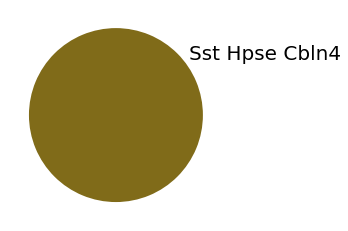

In [147]:
# tx_test_sema = tx_test.filter(regex = 'Sema|_id', axis =1)
met8 = meta_sst_468_sub.loc[meta_sst_468_sub['MET-type Label'] == 'Sst-MET-8']
met4 = meta_sst_468_sub.loc[meta_sst_468_sub['MET-type Label'] == 'Sst-MET-4']
met6 = meta_sst_468_sub.loc[meta_sst_468_sub['MET-type Label'] == 'Sst-MET-6']
met8_group = met8.groupby('T-type Label').count().reset_index()
met4_group = met4.groupby('T-type Label').count().reset_index()
met6_group = met6.groupby('T-type Label').count().reset_index()
print (met8_group)
colors = ['#806B19']
color_red = ['#BF1F20']
afont = {'fontname':'Arial'}
# plt.pie(met8_group['sample_id'], labels = met8_group['T-type Label'], startangle = 220, colors = colors, wedgeprops={'alpha':1}, autopct='%1.1f%%', textprops={'fontsize': 20}, radius = 1)
plt.pie(met8_group['sample_id'], labels = met8_group['T-type Label'], startangle = 220, colors = colors, wedgeprops={'alpha':1}, textprops={'fontsize': 20}, radius = 1)
plt.savefig('met8_ttype_pie_plot.pdf', bbox_inches = 'tight')

       T-type Label  cell_specimen_id  sample_id  MET-type Label  \
0  Sst Calb2 Necab1                 3          3               3   
1  Sst Calb2 Pdlim5                11         11              11   
2  Sst Nr2f2 Necab1                 1          1               1   

   cluster_color  
0              3  
1             11  
2              1  


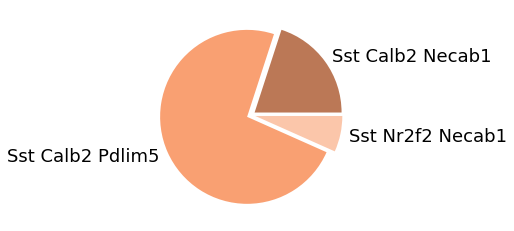

In [145]:
print (met4_group)
afont = {'fontname':'Arial'}
# colors = ['#BF480D', '#CC6D3D', '#FFDF11']
met4_colors = ['#bb7856', '#F9A072', '#FBC6AA']
met_color = ['#f9a072']
# plt.pie(met4_group['sample_id'], explode = [0.05, 0.05, 0.05], startangle = 0, labels = met4_group['T-type Label'], colors= met4_colors, wedgeprops={'alpha':1}, autopct='%1.1f%%', textprops={'fontsize': 18}, radius = 1)
plt.pie(met4_group['sample_id'], explode = [0.05, 0.05, 0.05], startangle = 0, labels = met4_group['T-type Label'], colors= met4_colors, wedgeprops={'alpha':1}, textprops={'fontsize': 18}, radius = 1)
# plt.savefig('met4_ttype_pie_plot.pdf', bbox_inches = 'tight')

       T-type Label  cell_specimen_id  sample_id  MET-type Label  \
0  Sst Chrna2 Glra3                 7          7               7   
1  Sst Chrna2 Ptgdr                 3          3               3   
2    Sst Myh8 Etv1                  8          8               8   

   cluster_color  
0              7  
1              3  
2              8  


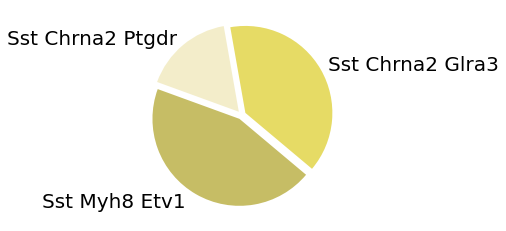

In [144]:
print (met6_group)
colors = ['#FF9F2C', '#FFB307', '#D6C300']
met_color = ['#D6C300']
met6_colors = ['#D6C300', '#ECE2A8', '#A19200' ]
# plt.pie(met6_group['sample_id'], explode = [0.05, 0.05, 0.05 ], labels = met6_group['T-type Label'], startangle = -40, colors = met6_colors, wedgeprops={'alpha':0.6}, autopct='%1.1f%%', textprops={'fontsize': 20}, radius = 1)
plt.pie(met6_group['sample_id'], explode = [0.05, 0.05, 0.05 ], labels = met6_group['T-type Label'], startangle = -40, colors = met6_colors, wedgeprops={'alpha':0.6}, textprops={'fontsize': 20}, radius = 1)

# plt.savefig('met6_ttype_pie_plot.pdf', bbox_inches = 'tight')

In [131]:
# tx_test_sub = tx_test[['sample_id', 'Sema3c']]
# print (tx_test_sub.head())
# tx_anno_df_sub = tx_anno_df[[ 'sample_id', 'seurat_cluster_label']]
# print (tx_anno_df_sub.head())
# which_met_cells = tx_test_sub.merge(tx_anno_df_sub, left_on = 'sample_id', right_on = 'sample_id', how = 'outer', suffixes=('_meta', '_tx'))
# # which_met_cells_sub = which_met_cells[['sample_id', 'Tree_first_cor_id' ]]
# print (which_met_cells.head(498))
print (tx_test.filter(regex = 'Pal'))

         Palb2  Pald1    Palld        Palm       Palm2      Palm3  Palmd
0     0.000000    0.0  1.01443    0.000000    1.014430   0.000000    0.0
1     0.000000    0.0  0.00000  159.705598  185.190534   0.000000    0.0
2     0.000000    0.0  0.00000  137.203603   13.156510   0.000000    0.0
3     0.000000    0.0  0.00000    6.482835    3.241418   0.000000    0.0
4     0.000000    0.0  0.00000    1.662568   19.950821   0.000000    0.0
..         ...    ...      ...         ...         ...        ...    ...
490   0.000000    0.0  0.00000    0.000000   71.878546   0.000000    0.0
491   0.000000    0.0  0.00000   29.239583  175.437497   0.000000    0.0
492   0.000000    0.0  0.00000   71.830885  196.478597   0.000000    0.0
493  36.624521    0.0  0.00000    0.000000   75.283738   0.000000    0.0
494   2.067209    0.0  0.00000   80.621155   43.411391  33.075346    0.0

[495 rows x 7 columns]


In [3]:

SUBCLASS_MARKER_GENES = {
    "Sst": [
        "Sst",
        "Hpse",
        "Calb2",
        "Pdlim5",
        "Nr2f2",
        "Chrna2",

###inhibitory synapse proteins        
#             "Bsn",
#         "Cep112",
#         "Clcn3",
#         "Dtnb",
#         "Erbb4",
#         "Gabra2",
#         "Gabrb3",
#         "Gabrg2",
#         "Gad1",
#         "Gad2",
#         "Git1",
#         "Glra1",
#         "Gphn",
#         "Igsf9",
#         "Igsf9b",
#         "Igsf21",
#         "Iqsec3",
#         "Lhfpl4",
#         "Maf1",
#         "Nlgn1",
#         "Nlgn2",
#         "Nlgn3",
#         "Nptn",
#         "Nrxn1",
#         "Pclo",
#         "Rims1",
#         "Rims2",
#         "Slc32a1",
#         "Syt11",

##regulation of inhibitory synapse assembly (positive and negative)
        "Cbln4",
        "Cbln1",
        "Cntnap2",
        "Fgf13",
        "Gabra1",
        "Gabrb2",
        "Hapln4",
        "Lgi2",
        "Npas4",
        "Plxnb1",
        "Sema4a",
        "Sema4d",
        "Srgap2",


##semaphorin-plexin signaling pathway involved in axon guidance 
        "Ece1",
        "Edn1",
        "Ednra",
        "Mef2c",
        "Nrp1",
        "Plxna1",
        "Plxna2",
        "Plxna3",
        "Plxna4",
        "Plxnb2",
        "Plxnb3",
        "Plxnc1",
        "Plxnd1",
        "Sema3a",
        "Sema3f",
####regulation of synaptic membrane adhesion
        "Lrfn3",
        "Magi2",
        "Mapk14",
        "Mdga1",
        "Mdga2",
        "Pcdh8",
        "Taok2",

###myelination genes
# #         "9630013A20Rik",
# #         "Abca2",
# #         "Abcd1",
# #         "Abcd2",
# #         "Acer3",
# #         "Adam22",
# # #         "Adgrg6",
# #         "Afg3l2",
# #         "Akt1",
# #         "Akt2",
# #         "Amigo1",
# #         "Arhgef10",
# #         "Atrn",
# #         "B4galt5",
# #         "B4galt6",
# #         "Bcas1",
#         "Cd9",
# #         "Cdh2",
# #         "Ckap5",
# #         "Cldn5",
#         "Clu",
# #         "Cmtm8",
# #         "Cntn1",
# #         "Cntn2",
#         "Cntnap1",
# #         "Cntnap2",
# #         "Cst7",
# #         "Ctnnb1",
# #         "Ctsc",
# #         "Cxcr4",
# #         "Cyfip1",
# #         "Dag1",
# #         "Degs1",
# # #         "Degs1l",
# #         "Dicer1",
# #         "Dlg1",
# #         "Egr2",
# #         "Eif2ak3",
# #         "Eif2b2",
# #         "Eif2b4",
# #         "Eif2b5",
# #         "Enpp1",
#         "Epb4.1l3",
# #         "Erbb2",
# #         "Ercc2",
#         "Fa2h",
# #         "Fgfr3",
# #         "Fig4",
# #         "Fyn",
# #         "Gal3st1",
# #         "Galc",
# #         "Gjc3",
#         "Gnpat",
# #         "Gpc1",
# #         "Gpm6b",
# #         "Hes5",
# #         "Hexa",
# #         "Hexb",
# #         "Hgf",
# #         "Hnrnpk",
# # #         "Hycc1",
# #         "Id4",
# #         "Ifng",
# #         "Igf1",
# #         "Ilk",
# #         "Itgax",
# #         "Itgb4",
# #         "Jam2",
# #         "Jam3",
# #         "Kcnj10",
# #         "Kel",
# #         "Kif14",
# #         "Klk8",
# #         "Lgi4",
# #         "Lpin1",
# #         "Mag",
# #         "Mal",
# #         "Mal2",
# #         "Mall",
# #         "Marveld1",
# #         "Mbp",
# #         "Mir23a",
# #         "Mir23b",
# #         "Mir24-1",
# #         "Mir24-2",
# #         "Mir27b",
# #         "Mir30a",
# #         "Mir34a",
# #         "Mir100",
# #         "Mir138-1",
# #         "Mir138-2",
# #         "Mir140",
# #         "Mir146b",
# #         "Mir195a",
# #         "Mir204",
# #         "Mir219a-1",
# #         "Mir219a-2",
# #         "Mir338",
# #         "Mpdz",
# #         "Mpz",
# #         "Mtmr2",
# #         "Mtor",
# #         "Myo5a",
# #         "Myoc",
#         "Myrf",
# #         "Nab1",
# #         "Nab2",
# #         "Ncmap",
# #         "Ncstn",
# #         "Ndrg1",
# #         "Nf1",
#         "Nfasc",
# #         "Ngfr",
# #         "Nkx6-2",
# #         "Nrd1",
# #         "Nrg1",
# #         "Nsun5",
# #         "Ntf3",
# #         "Ntrk2",
# #         "Ntrk3",
# #         "Olig2",
# #         "Omg",
# #         "Ormdl1",
# #         "Ormdl3",
# # #         "Pals1",
# #         "Pard3",
# #         "Pikfyve",
# #         "Plec",
# #         "Pllp",
# #         "Plp1",
#         "Pmp22",
# #         "Pou3f1",
# #         "Pou3f2",
# #         "Ppp3r1",
# #         "Prx",
# #         "Psap",
#         "Pten",
# #         "Ptn",
# #         "Ptprz1",
# # #         "Qki",
# #         "Rara",
# #         "Rarb",
# #         "Rarg",
# #         "Reg2",
# #         "Rnf10",
# #         "Rxra",
# #         "Rxrb",
# #         "Rxrg",
# #         "S100b",
# #         "Serinc5",
# # #         "Sgms1os1",
# #         "Sh3tc2",
# #         "Sirt2",
# #         "Ski",
# #         "Slc8a3",
# #         "Slc25a12",
# #         "Slc25a46",
# #         "Sod1",
# #         "Sox10",
# #         "Tcf7l2",
# #         "Tenm4",
# #         "Tg",
# #         "Tgfb1",
# #         "Tlr2",
# #         "Tmem98",
# #         "Tnf",
# #         "Tnfrsf1b",
# #         "Tnfrsf21",
# #         "Tppp",
# #         "Trf",
# #         "Tsc1",
# #         "Tspan2",
# #         "Tymp",
#         "Ugt8a",
# #         "Ulk4",
# #         "Wasf3",
# #         "Xk",
# # #         "Zfp24",
# #         "Zfp488",
# #         "Zpr1",





    ]}
subclass = "Sst"

In [4]:
genes = SUBCLASS_MARKER_GENES[subclass]
# print (genes)
tx_data = pd.read_feather(tx_data_file, columns=["sample_id"] + genes).set_index("sample_id")
# print (tx_data.head())
# sample_ids = meta_anno_sst_468['sample_id'].values

# sample_ids = tx_anno_df.loc[metadata_met.index, "sample_id"].values
tx_data2 = tx_data.merge(meta_sst_468_sub, on = 'sample_id')
# tx_data2= tx_data2.rename(columns = {"Epb4.1l3":"Epb41l3"})
tx_data2['met_type'] = tx_data2['MET-type Label']

print (tx_data2.head())

             sample_id          Sst        Hpse       Calb2      Pdlim5  \
0  P8S4_170706_354_A01     0.000000    0.000000  540.691334  198.828333   
1  P2S4_170710_052_A01  4988.251445    0.000000  205.578483    0.000000   
2  P2S4_170710_053_A01   998.015247  693.536019    0.000000  189.829642   
3  P2S4_170710_054_A01   599.662244    0.000000    0.000000    0.000000   
4  P2S4_170710_055_A01  3062.451058    0.000000    0.000000  101.416675   

   Nr2f2  Chrna2       Cbln4  Cbln1      Cntnap2  ...      Mapk14     Mdga1  \
0    0.0     0.0    0.000000    0.0   821.688519  ...  399.685527  2.028861   
1    0.0     0.0  224.267436    0.0   524.989679  ...   13.591966  0.000000   
2    0.0     0.0    0.000000    0.0  1110.785331  ...   69.541552  0.000000   
3    0.0     0.0   77.794021    0.0  1792.503898  ...  450.557038  0.000000   
4    0.0     0.0    0.000000    0.0  7079.216398  ...  189.532802  0.000000   

         Mdga2       Pcdh8       Taok2  cell_specimen_id  MET-type Label  

In [7]:
###Code adapted from Nathan Gouwens
def gene_dot_plot(df, column, genes, order, ax, expression_threshold=0, scatter_factor=8):
    total_counts = df.groupby(column).count()

    for i, gene in enumerate(genes):
        df_above_thresh = df.loc[df[gene] > expression_threshold, :]
        above_thresh_counts = df_above_thresh.groupby(column).count()
        max_val = df[gene].max()
        above_thresh_median = np.log2(df_above_thresh.groupby(column).median().fillna(0) + 1)

        above_thresh_fraction = (above_thresh_counts / total_counts).fillna(0)
#         print (scatter_factor * above_thresh_fraction[gene].reindex(order, fill_value=0))

        ax.scatter(x=range(len(order)), y=[i] * len(order),
            s=scatter_factor * above_thresh_fraction[gene].reindex(order, fill_value=0),
            c=above_thresh_median[gene].reindex(order, fill_value=0),
            edgecolors="darkgray", linewidths=0.25,
            vmin=0, vmax=np.log2(max_val + 1),
            cmap="Greys")
        if i % 2 == 0:
            bg_color="#eeeded"
            ax.axhspan(i - 0.5, i + 0.5, color=bg_color, zorder=-1, lw=0)
    ax.set_yticks(range(len(genes)))
    ax.set_yticklabels(genes, fontsize=9)
    ax.set_xticks(range(len(order)))
    ax.set_xticklabels([t.split("-")[-1] for t in order], rotation=0, fontsize=9)
    print (order)
    ax.set_ylim(-0.5, len(genes) - 0.5)
    ax.set_xlim(-0.5, len(order) - 0.5)

    ax.tick_params("both", length=0, width=0)

    ax.invert_yaxis()
    sns.despine(ax=ax, left=True, bottom=True)

 
    return ax



met_type
Sst-MET-8    50.0
Sst-MET-4    50.0
Sst-MET-6    50.0
Name: Sst, dtype: float64
met_type
Sst-MET-8    50.000000
Sst-MET-4    10.000000
Sst-MET-6     2.777778
Name: Hpse, dtype: float64
met_type
Sst-MET-8    25.000000
Sst-MET-4    50.000000
Sst-MET-6     5.555556
Name: Calb2, dtype: float64
met_type
Sst-MET-8     5.555556
Sst-MET-4    33.333333
Sst-MET-6     5.555556
Name: Pdlim5, dtype: float64
met_type
Sst-MET-8     5.555556
Sst-MET-4     3.333333
Sst-MET-6    38.888889
Name: Nr2f2, dtype: float64
met_type
Sst-MET-8     0.000000
Sst-MET-4     0.000000
Sst-MET-6    27.777778
Name: Chrna2, dtype: float64
met_type
Sst-MET-8    33.333333
Sst-MET-4    46.666667
Sst-MET-6     2.777778
Name: Cbln4, dtype: float64
met_type
Sst-MET-8    0.000000
Sst-MET-4    3.333333
Sst-MET-6    0.000000
Name: Cbln1, dtype: float64
met_type
Sst-MET-8    50.0
Sst-MET-4    50.0
Sst-MET-6    50.0
Name: Cntnap2, dtype: float64
met_type
Sst-MET-8    30.555556
Sst-MET-4    26.666667
Sst-MET-6    50.000000


<AxesSubplot: >

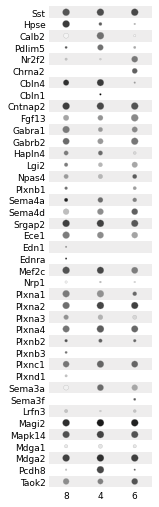

In [8]:
# met_types = [t for t in MET_NAME_ORDER if t.split("-")[0] == subclass]

# SST_MET_NAME_ORDER = {'Sst-MET-8','Sst-MET-4', 'Sst-MET-6'}
order_846 = ['Sst-MET-8','Sst-MET-4', 'Sst-MET-6']
met_types = [8,4,6]

# SST_MET_NAME_ORDER = {'Sst-MET-1','Sst-MET-2', 'Sst-MET-3','Sst-MET-4','Sst-MET-5', 'Sst-MET-6', 'Sst-MET-7','Sst-MET-8', 'Sst-MET-9', 'Sst-MET-10', 'Sst-MET-11', 'Sst-MET-12'}
# met_types = [1,2,3,4,5,6, 7,8, 9,10,11,12]

fig = plt.figure(figsize=(8, 32))
# fig = plt.figure(figsize=(16, 100))

g_main = gridspec.GridSpec(2, 1, height_ratios=(1.8, 1), hspace=0.125, wspace = 0.125)

# rev_met_lookup = {v: k for k, v in constants.MET_NAMES.items()}

# Customize layouts per subclass
subclass = "Sst"
g_sst = gridspec.GridSpecFromSubplotSpec(
    2, 1,
    subplot_spec=g_main[0],
    height_ratios=(0.8, 1),
#     width_ratios=(1.7, 1),
    wspace=0.1,
    hspace=0.1,
)
g_sst_other = gridspec.GridSpecFromSubplotSpec(
    1, 4,
    subplot_spec=g_sst[1],
    width_ratios=(1, 1, 0.2, 1),

    hspace=0.1,
    wspace=0.1,
)
g_genes = gridspec.GridSpecFromSubplotSpec(
    2, 5,
    height_ratios=(0.95, 0.05),
    subplot_spec=g_sst_other[1],
)

ax = plt.subplot(g_genes[0, 1:])
scatter_factor = 50
gene_dot_plot(tx_data2, "met_type", genes, order_846, ax, scatter_factor=scatter_factor)
# gene_dot_plot(tx_data2, "met_type", genes, SST_MET_NAME_ORDER, ax, scatter_factor=scatter_factor)

# plt.savefig('met846_inh_syn_form_sema_synadhes_gene_dot_plot.pdf', facecolor = 'white', bbox_inches = 'tight')